## Simplicial Trend Filtering

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

from pytspl import load_dataset

# load the dataset
sc, coordinates, flow = load_dataset("lastfm-1k-artist")

# convert the dictionaries to numpy arrays
flow = np.asarray(list(flow.values()))

(CVXPY) Jul 30 01:43:04 AM: Encountered unexpected exception importing solver ECOS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so, 0x0002): tried: '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (no such file), '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))")
(CVXPY) Jul 30 01:43:04 AM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pyts

In [3]:
from pytspl.filters import SimplicialTrendFilter


trend_fil = SimplicialTrendFilter(simplicial_complex=sc)

print("Divergence:", norm(sc.get_divergence(flow)))
print("Curl:", norm(sc.get_curl(flow)))

Divergence: 1.4142135623730951
Curl: 220.68076490713912


### Denoising

#### L2 regularizer

In [4]:

num_realizations = 50
snr_db = np.arange(-12, 12.5, 12)

trend_fil.denoising_l2_regularizer(flow=flow, component="divergence", 
                         num_realizations=num_realizations, snr_db=snr_db)

divergence_error_l2 = trend_fil.history["errors"]

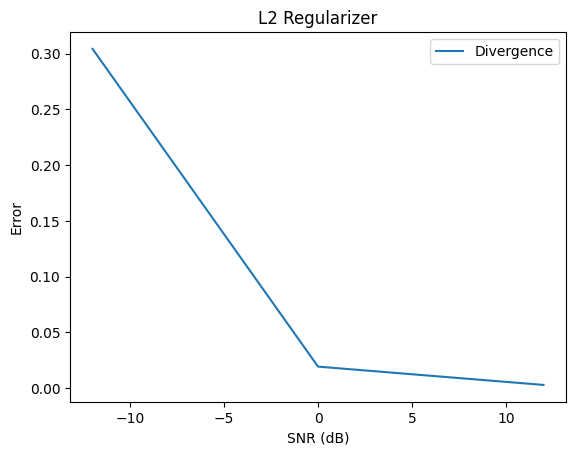

In [12]:
# plot error
plt.plot(snr_db, divergence_error_l2, label="Divergence")
plt.xlabel("SNR (dB)")
plt.ylabel("Error")
plt.title("L2 Regularizer")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


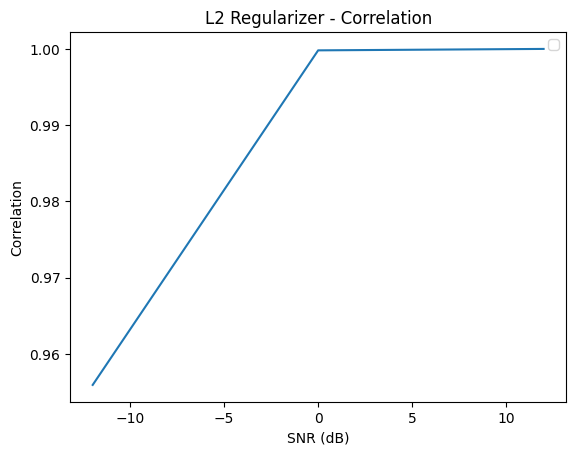

In [13]:
plt.plot(snr_db, trend_fil.history["correlations"])
plt.xlabel("SNR (dB)")
plt.ylabel("Correlation")
plt.title("L2 Regularizer - Correlation")
plt.legend()

#### L1 regularizer

In [14]:
num_realizations = 50
snr_db = np.arange(-12, 12.5, 12)

shift_operator = sc.incidence_matrix(rank=1)

trend_fil.denoising_l1_regularizer(flow=flow, 
                                   shift_operator=shift_operator, 
                                   component="divergence",
                                   num_realizations=num_realizations, 
                                   snr_db=snr_db)

divergence_error_l1 = trend_fil.history["errors"]

SNR: 0.06309573444801933 dB - l1 error: 0.2913374087439136 - corr: 0.9592336129625149
SNR: 1.0 dB - l1 error: 0.01973734786054212 - corr: 0.9998015438707051
SNR: 15.848931924611133 dB - l1 error: 0.0032433667426389158 - corr: 0.9999946383353202


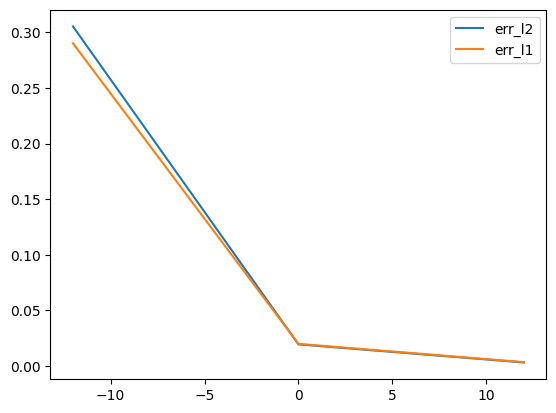

In [8]:
plt.plot(snr_db, divergence_error_l2, label="err_l2")
plt.plot(snr_db, divergence_error_l1, label="err_l1")
plt.legend()

### Interpolation

In [15]:
ratio = np.arange(0.05, 1.05, 0.3)
num_realizations = 50

In [16]:
shift_operator = sc.incidence_matrix(rank=1)

trend_fil.interpolation_l1_regularizer(flow=flow, shift_operator=shift_operator, 
                                       component="divergence",
                                       ratio=ratio, 
                                       num_realizations=num_realizations)

Ratio: 0.05  - error: 0.953262055129688 - corr: 0.2884334529286526
Ratio: 0.35  - error: 0.6718894703181594 - corr: 0.7314517997164589
Ratio: 0.65  - error: 0.35957185462258323 - corr: 0.9289686898098821
Ratio: 0.95  - error: 0.008485874365762746 - corr: 0.9998590190173505
